# Idea: Customer Segmentation Analysis

#Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
customer = pd.read_csv('/content/ifood_df.csv')

# Check total rows and columns

In [4]:
customer.shape

(2205, 39)

# Glance the top 5 rows of the data

In [6]:
customer.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Retrieving the list of actual columns

In [7]:
customer.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# Data Exploration and Cleaning

# Check for missing values and handle

In [8]:
customer.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Check for duplicates value

In [13]:
customer.duplicated().sum()

184

# Checking column types

In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Assessing unique values

In [15]:
customer.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

# Drop Unnessary columns
# Z_CostContact,Z_Revenue

In [18]:
customer.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

# Box plot for the total amount spent on all products (MntTotal)

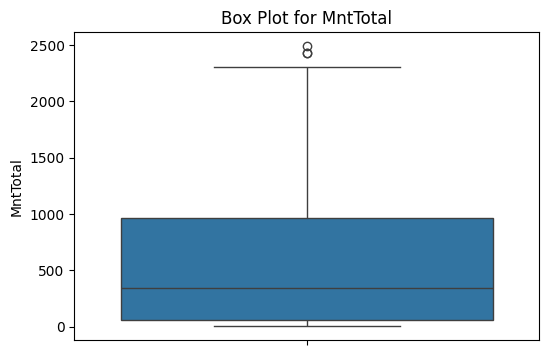

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=customer, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

# Fixed the outliers

In [20]:
customer.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [22]:
Q1=customer['MntTotal'].describe()['25%']
Q1

56.0

In [23]:
Q3=customer['MntTotal'].describe()['75%']
Q3

964.0

In [24]:
IQR=Q3-Q1
IQR

908.0

In [25]:
L_L=Q1-1.5*IQR
L_L

-1306.0

In [26]:
U_L=Q3+1.5*IQR
U_L

2326.0

# Remove the outliers

In [27]:
customer['MntTotal']=customer['MntTotal'].clip(L_L,U_L)

# check it's fixed or not

<Axes: ylabel='MntTotal'>

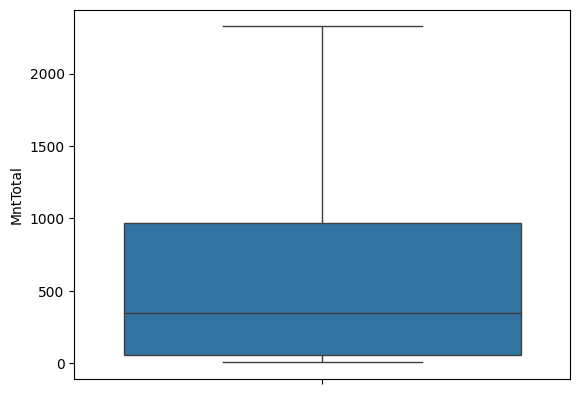

In [28]:
sns.boxplot(customer['MntTotal'])

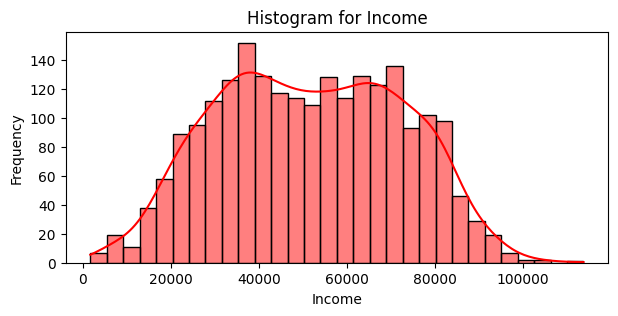

In [30]:
plt.figure(figsize=(7, 3))
sns.histplot(data=customer, x='Income',color='red', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Histogram for age

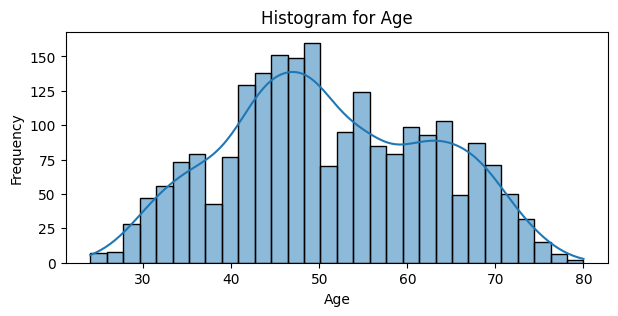

In [33]:
plt.figure(figsize=(7, 3))
sns.histplot(data=customer, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate average purchase value for different product categories

In [35]:
average_purchase_values = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Calculate frequency of purchases

In [36]:
num_total_purchases = customer[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum()


# Calculate average frequency of purchases per customer

In [38]:
num_customers = len(customer)
average_frequency_purchases = num_total_purchases / num_customers

# Calculate average customer age

In [39]:
average_age = customer['Age'].mean()

# Calculate acceptance rates for marketing campaigns

In [40]:
acceptance_rates = customer[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()

# Calculate percentage of customers who complained

In [41]:
complaint_percentage = (customer['Complain'].sum() / num_customers) * 100

# Display the results

In [42]:
print("Average Purchase Value for Different Product Categories:")
print(average_purchase_values)
print("\nFrequency of Purchases per Customer:", average_frequency_purchases)
print("\nAverage Customer Age:", average_age)
print("\nAcceptance Rates for Marketing Campaigns:")
print(acceptance_rates)
print("\nPercentage of Customers who Complained:", complaint_percentage)

Average Purchase Value for Different Product Categories:
MntWines            306.164626
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
MntSweetProducts     27.128345
MntGoldProds         44.057143
dtype: float64

Frequency of Purchases per Customer: 14.88798185941043

Average Customer Age: 51.09569160997732

Acceptance Rates for Marketing Campaigns:
AcceptedCmp1    0.064399
AcceptedCmp2    0.013605
AcceptedCmp3    0.073923
AcceptedCmp4    0.074376
AcceptedCmp5    0.073016
dtype: float64

Percentage of Customers who Complained: 0.9070294784580499


# Selecting relevant features for clustering

In [43]:
X = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Standardize the features

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters using the elbow method

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method

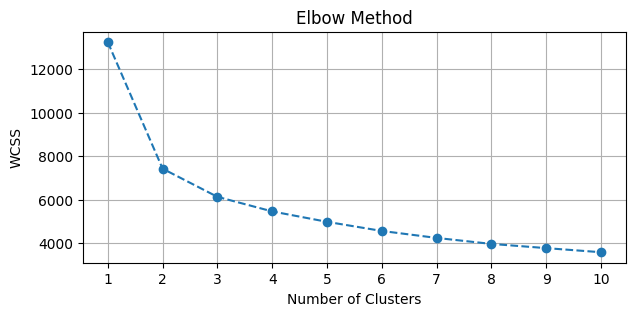

In [47]:
plt.figure(figsize=(7, 3))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# From the plot, choose the optimal number of clusters
# In this case, let's say the optimal number of clusters is 4

# Applying K-means clustering with the chosen number of clusters

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

# Adding cluster labels to the DataFrame

In [49]:
customer['Cluster'] = kmeans.labels_

# Displaying the count of customers in each cluster

In [50]:
print(customer['Cluster'].value_counts())

2    1275
3     385
0     343
1     202
Name: Cluster, dtype: int64


# You can further analyze the characteristics of each cluster by examining their centroids

In [51]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("\nCluster Centers:")
print(cluster_centers)


Cluster Centers:
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.614594   1.602194         1.224131         1.684550          1.697323   
1  0.509545  -0.020218         0.028329        -0.104751         -0.092569   
2 -0.620203  -0.502705        -0.595798        -0.524622         -0.503546   
3  1.239027   0.248001         0.867644         0.291563          0.203996   

   MntGoldProds  
0      0.890421  
1      1.896325  
2     -0.515595  
3     -0.080748  


#A scatter plot illustrating customer segments based on two features (you can choose any two features, here I've used 'MntWines' and 'MntMeatProducts'). Each cluster is represented by a different color.

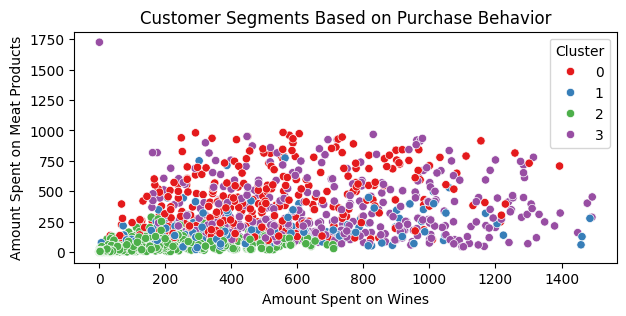

In [53]:
# Scatter plot of clusters based on two features (e.g., MntWines and MntMeatProducts)
plt.figure(figsize=(7, 3))
sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='Cluster', data=customer, palette='Set1', legend='full')
plt.title('Customer Segments Based on Purchase Behavior')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Meat Products')
plt.show()

# A bar chart showing the count of customers in each cluster.

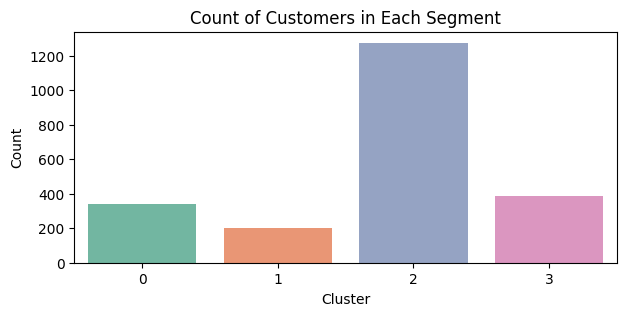

In [56]:
# Bar chart showing the count of customers in each cluster
plt.figure(figsize=(7, 3))
sns.countplot(x='Cluster', data=customer, palette='Set2')
plt.title('Count of Customers in Each Segment')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# Segment:
#Cluster 0: Wine and fruit enthusiasts or health-conscious individuals.
#Cluster 1: Luxury or quality-oriented customers with a preference for meat and gold products.
#Cluster 2: General consumers with balanced spending across categories.
#Cluster 3: Seafood lovers or individuals with a sweet tooth, showing higher spending on fish and sweet products.
#Recommendations:
#Targeted Marketing: Tailor campaigns to each segment's preferences.
#Product Assortment: Adjust offerings to match segment preferences.
#Loyalty Programs: Design rewards aligned with each segment.
#Personalization: Offer personalized recommendations and offers.